In [1]:
from FCNetwork import TrainFCNN
from utils.helper import Extract
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import os

In [2]:
extract = Extract()

In [4]:
train_df_list = extract.load_all_csv('./data/humans/train')
test_df_list = extract.load_all_csv('./data/humans/test')
# debug_df_list = extract.load_all_csv('./data/enc_debug_set')

In [5]:
fc_model_win_10 = TrainFCNN(10,40)

In [6]:
fc_model_win_10.loadTestTrainData(train_df_list, test_df_list, max_size=1000, logging=True)

Train data extraction started.
0 Dataframes seperated into labels and features.
100 Dataframes seperated into labels and features.
200 Dataframes seperated into labels and features.
300 Dataframes seperated into labels and features.
400 Dataframes seperated into labels and features.
500 Dataframes seperated into labels and features.
600 Dataframes seperated into labels and features.
700 Dataframes seperated into labels and features.
800 Dataframes seperated into labels and features.
900 Dataframes seperated into labels and features.
1000 Dataframes seperated into labels and features.
Test data extraction started.
0 Dataframes seperated into labels and features.
100 Dataframes seperated into labels and features.
200 Dataframes seperated into labels and features.
300 Dataframes seperated into labels and features.
400 Dataframes seperated into labels and features.
500 Dataframes seperated into labels and features.
600 Dataframes seperated into labels and features.
700 Dataframes seperated

In [6]:
cwd = os.getcwd()
path = cwd + "/" + "models/humans/fcnn_win_10_epochs_50.pt"
fc_model_win_10.trainNN(num_epochs=50, logging=True, save_path=path, save_after_epochs=50)

Epoch: 1 Current Loss: 7.390192031860352 Avg Loss: 7.862736867836911
Epoch: 6 Current Loss: 9.486346244812012 Avg Loss: 7.153751737536456
Epoch: 11 Current Loss: 9.19762897491455 Avg Loss: 7.042654206061621
Epoch: 16 Current Loss: 6.715242862701416 Avg Loss: 7.005434382111833
Epoch: 21 Current Loss: 4.326173305511475 Avg Loss: 6.979779153941138
Epoch: 26 Current Loss: 8.221437454223633 Avg Loss: 6.957626834325463
Epoch: 31 Current Loss: 0.50162273645401 Avg Loss: 6.939792210283698
Epoch: 36 Current Loss: 5.951112270355225 Avg Loss: 6.933364867036544
Epoch: 41 Current Loss: 8.221637725830078 Avg Loss: 6.927597195831756
Epoch: 46 Current Loss: 7.339024066925049 Avg Loss: 6.922714537734103


In [7]:
predicted_prots_10 = fc_model_win_10.predict_on_test_data()

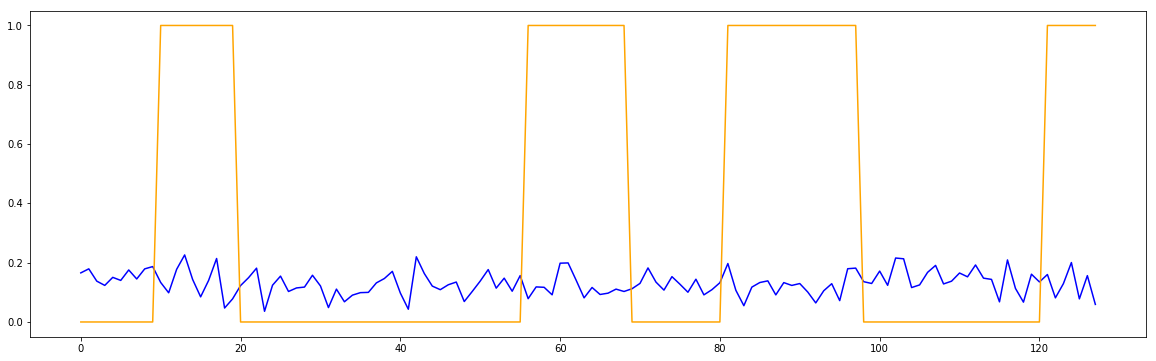

In [9]:
n = 10
plt.figure(figsize=(20, 6))
plt.plot(predicted_prots_10[n][1], color='blue')
plt.plot(predicted_prots_10[n][2], color='orange')

In [10]:
loss = 0
for protein in predicted_prots_10:
    loss += protein[0]
    
print(loss/len(predicted_prots_10))

tensor(0.2698, grad_fn=<DivBackward0>)


Seperating Labels
0 Dataframes seperated into labels and features.
Running Predictions
tensor(0.1664, grad_fn=<DivBackward0>)


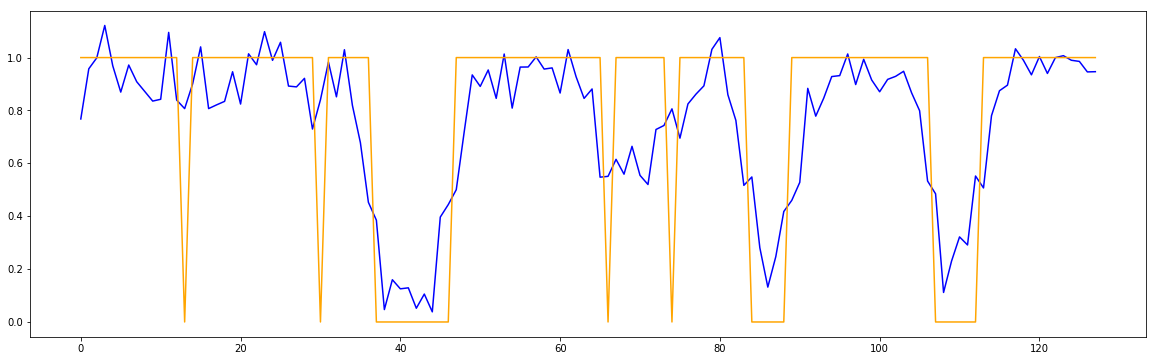

In [14]:
train_pred = fc_model_win_10.predict_on_outside_data(train_df_list, max_size=20, logging=True)
loss = 0
for protein in train_pred:
    loss += protein[0]
    
print(loss/len(train_pred))
n = 10
plt.figure(figsize=(20, 6))
plt.plot(train_pred[n][1], color='blue')
plt.plot(train_pred[n][2], color='orange')

tensor(0.2172, grad_fn=<DivBackward0>)


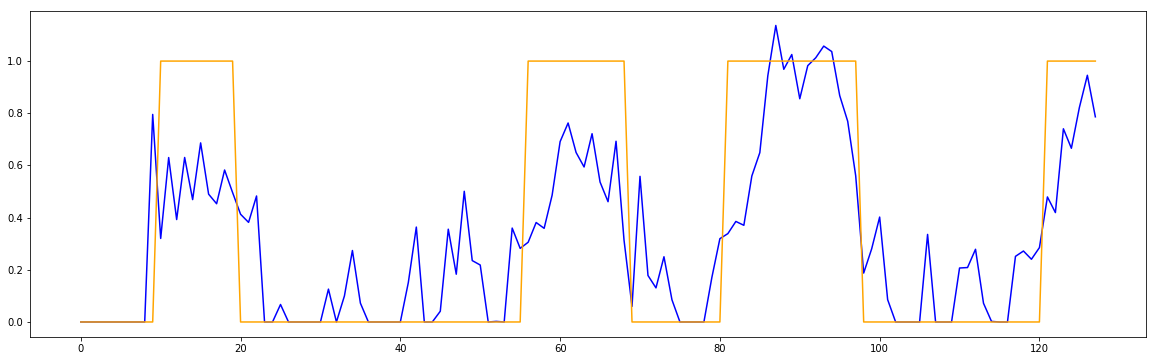

In [16]:
# cwd = os.getcwd()
# path = cwd + "/" + "models/humans/fcnn_win_10_epochs_250.pt"
# fc_model_win_10.trainNN(num_epochs=200, logging=True, save_path=path, save_after_epochs=50)
# predicted_prots_10 = fc_model_win_10.predict_on_test_data()
loss = 0
for protein in predicted_prots_10:
     loss += protein[0]
    
print(loss/len(predicted_prots_10))
n = 10
plt.figure(figsize=(20, 6))
plt.plot(predicted_prots_10[n][1], color='blue')
plt.plot(predicted_prots_10[n][2], color='orange')

tensor(0.2180, grad_fn=<DivBackward0>)


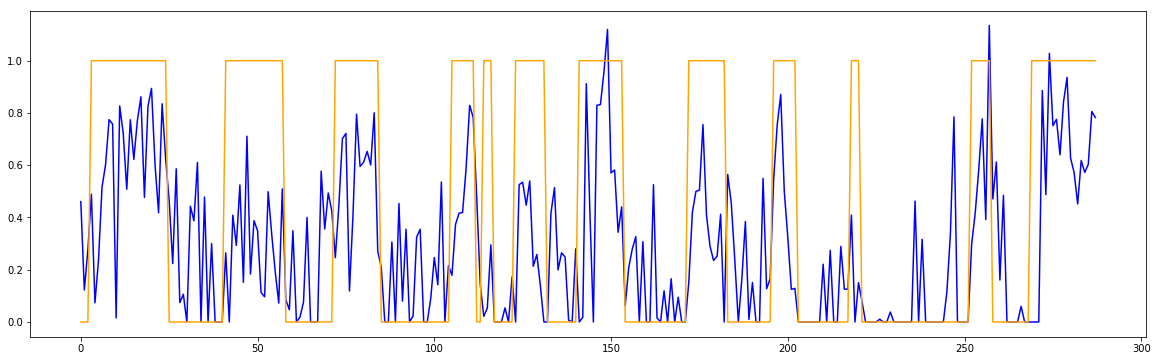

In [24]:
# cwd = os.getcwd()
# path = cwd + "/" + "models/humans/fcnn_win_10_epochs_500.pt"
# fc_model_win_10.trainNN(num_epochs=250, logging=True, save_path=path, save_after_epochs=50)
# predicted_prots_10 = fc_model_win_10.predict_on_test_data()
loss = 0
for protein in predicted_prots_10:
     loss += protein[0]
    
print(loss/len(predicted_prots_10))
n = 5
plt.figure(figsize=(20, 6))
plt.plot(predicted_prots_10[n][1], color='blue')
plt.plot(predicted_prots_10[n][2], color='orange')

## Testing on Mouse Test Set

In [20]:
test_df_mouse_list = extract.load_all_csv('./data/mouse/test')

In [21]:
test_mouse_pred = fc_model_win_10.predict_on_outside_data(test_df_mouse_list, max_size=500, logging=True)

Seperating Labels
0 Dataframes seperated into labels and features.
100 Dataframes seperated into labels and features.
200 Dataframes seperated into labels and features.
300 Dataframes seperated into labels and features.
400 Dataframes seperated into labels and features.
500 Dataframes seperated into labels and features.
Running Predictions


In [22]:
loss = 0
for protein in test_mouse_pred:
    loss += protein[0]
    
print(loss/len(test_mouse_pred))

tensor(0.2439, grad_fn=<DivBackward0>)


tensor(0.2387, grad_fn=<DivBackward0>)


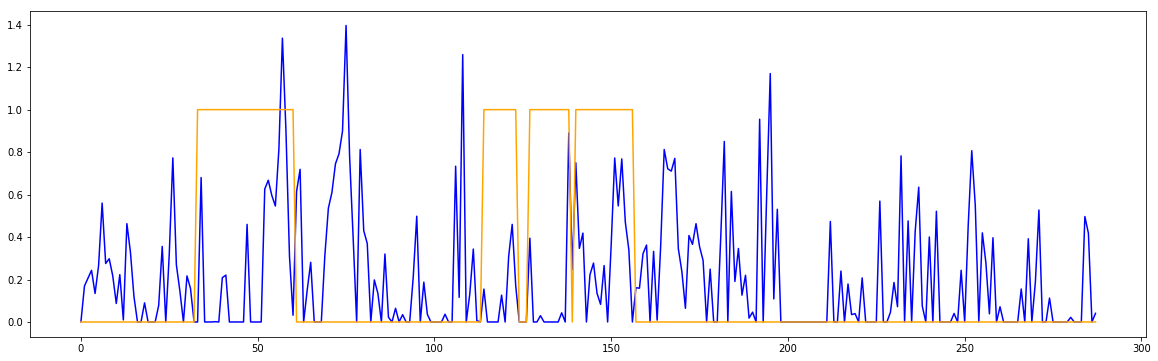

In [26]:
n = 10
plt.figure(figsize=(20, 6))
plt.plot(test_mouse_pred[n][1], color='blue')
plt.plot(test_mouse_pred[n][2], color='orange')
print(test_mouse_pred[n][0])